In [1]:
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from architecture import EIT
from lenet import lenet

In [3]:
batchSize = 250
epochs = 1000
optimizer = "adam"
lossFunction = "mse"
patience = 20
earlyStop = EarlyStopping(monitor = "val_loss" ,patience = patience)

In [10]:
print("Importing dataset...")
inputData = np.load("../data/1366_seed_A_input.npy")
inputData = np.reshape(inputData, (len(inputData), 32, 32, 1))
outputData = np.load("../data/1366_seed_A_output.npy")
print(f"input Data: {inputData.shape}")
print(f"output Data: {outputData.shape}")

Importing dataset...
input Data: (10000, 32, 32, 1)
output Data: (10000, 1366)


In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(inputData, outputData,
                                                test_size = 500)
print(f"xTrain: {xTrain.shape}")
print(f"yTrain: {yTrain.shape}")
print(f"xTest:  {xTest.shape}")
print(f"yTest:  {yTest.shape}")

xTrain: (9500, 32, 32, 1)
yTrain: (9500, 1366)
xTest:  (500, 32, 32, 1)
yTest:  (500, 1366)


In [6]:
model_eit = EIT().build(numberOfCondValues = 1366)
model_eit.compile(optimizer = optimizer,
              loss = lossFunction,
              metrics = ["mse"])
model_eit.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 60)        45060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 60)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 355)               1363555   
_________________________________________________________________
dense_2 (Dense)              (None, 1366)             

In [7]:
history_eit = model_eit.fit(x = xTrain, y = yTrain,
                            validation_data = (xTest, yTest),
                            epochs = epochs,
                            batch_size = batchSize,
                            verbose = 1,
                            callbacks = [earlyStop])

Train on 9500 samples, validate on 500 samples
Epoch 1/1000
9500/9500 [==============================] - 11s 1ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.3359 - val_mse: 0.3359
Epoch 2/1000
9500/9500 [==============================] - 2s 228us/step - loss: 0.3326 - mse: 0.3326 - val_loss: 0.3310 - val_mse: 0.3310
Epoch 3/1000
9500/9500 [==============================] - 2s 229us/step - loss: 0.3307 - mse: 0.3307 - val_loss: 0.3302 - val_mse: 0.3302
Epoch 4/1000
9500/9500 [==============================] - 2s 229us/step - loss: 0.3287 - mse: 0.3287 - val_loss: 0.3263 - val_mse: 0.3263
Epoch 5/1000
9500/9500 [==============================] - 2s 229us/step - loss: 0.3242 - mse: 0.3242 - val_loss: 0.3198 - val_mse: 0.3198
Epoch 6/1000
9500/9500 [==============================] - 2s 233us/step - loss: 0.3162 - mse: 0.3162 - val_loss: 0.3120 - val_mse: 0.3120
Epoch 7/1000
9500/9500 [==============================] - 2s 229us/step - loss: 0.3078 - mse: 0.3078 - val_loss: 0.2990 - val_

9500/9500 [==============================] - 2s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 60/1000
9500/9500 [==============================] - 3s 263us/step - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 61/1000
9500/9500 [==============================] - 2s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 62/1000
9500/9500 [==============================] - 3s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 63/1000
9500/9500 [==============================] - 2s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 64/1000
9500/9500 [==============================] - 3s 264us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 65/1000
9500/9500 [==============================] - 3s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 66/1000
9500/9500 [================

Epoch 118/1000
9500/9500 [==============================] - 3s 264us/step - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 119/1000
9500/9500 [==============================] - 3s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 120/1000
9500/9500 [==============================] - 3s 264us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 121/1000
9500/9500 [==============================] - 3s 264us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 122/1000
9500/9500 [==============================] - 3s 264us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 123/1000
9500/9500 [==============================] - 3s 263us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 124/1000
9500/9500 [==============================] - 3s 264us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 125/1000
9500/

9500/9500 [==============================] - 3s 272us/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 177/1000
9500/9500 [==============================] - 3s 271us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 178/1000
9500/9500 [==============================] - 3s 270us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 179/1000
9500/9500 [==============================] - 2s 261us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 180/1000
9500/9500 [==============================] - 2s 262us/step - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 181/1000
9500/9500 [==============================] - 2s 259us/step - loss: 0.1269 - mse: 0.1269 - val_loss: 0.1268 - val_mse: 0.1268
Epoch 182/1000
9500/9500 [==============================] - 2s 255us/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 183/1000
9500/9500 [=========

In [13]:
print("Importing validation data...")
xValidation = np.load("data/1366_seed_99_input.npy")
xValidation = np.reshape(xValidation, (len(xValidation), 32, 32, 1))
yValidation = np.load("data/1366_seed_99_output.npy")
print(f"input Validation Data:  {xValidation.shape}")
print(f"output Validation Data: {yValidation.shape}")

Importing validation data...
input Validation Data:  (5, 32, 32, 1)
output Validation Data: (5, 1366)


In [15]:
print(model_eit.metrics_names)

['loss', 'mse']


In [18]:
score = model_eit.evaluate(x = xValidation, y = yValidation)
print(f"{model_eit.metrics_names[1]}: {score[1]}")

5/5 [==============================] - 0s 798us/step
mse: 0.18456019461154938


In [20]:
print(history_eit.history.keys())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


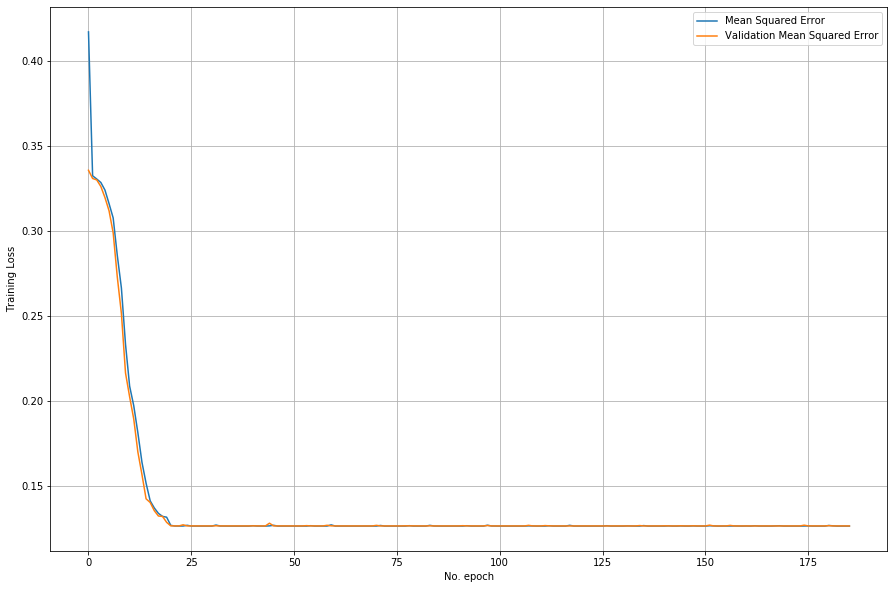

In [34]:
%matplotlib inline
plt.figure(figsize = (15,10))
plt.plot(history_eit.history['mse'][:],label = "Mean Squared Error")
plt.plot(history_eit.history['val_mse'][:], label = "Validation Mean Squared Error")
plt.ylabel("Training Loss")
plt.xlabel("No. epoch")
plt.grid()
plt.legend(loc="upper right")
plt.show()

In [32]:
print("Saving model...", end = " ")
model_eit.save("eit_1366.h5")
print("Done")

del model_eit

Saving model... Done
